In [ ]:
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import warnings
from src.Imported_Files.darknet import Darknet
from src.Imported_Files.utils import *

In [4]:
warnings.filterwarnings('ignore')

path_to_dashcam_video_dataset = "../../../Crash_Detection_Project/"

def read_images_from_video(filename):
    vid_cap = cv2.VideoCapture(filename)
    success, image = vid_cap.read()
    count = 0
    frames = []
    while success:
        frames.append(np.array(Image.fromarray(image)))
        success, image = vid_cap.read()
        count += 1
    return frames

def read_images_from_multiple_videos_positive(video_numbers):
    base_file_name = path_to_dashcam_video_dataset + 'videos/training/positive/000000.mp4'
    # first of the two zeros starts at 31
    file_names = []
    ''' print(base_file_name[0:31])
        print(str(video_numbers[i]))
        print(base_file_name[33:])'''
    for i in range(len(video_numbers)):
        file_names.append(base_file_name[0:29 + len(path_to_dashcam_video_dataset)] + str(video_numbers[i]) + base_file_name[31 + len(path_to_dashcam_video_dataset):])
    frames = []
    for filename in file_names:
        vid_cap = cv2.VideoCapture(filename)
        success, image = vid_cap.read()
        count = 0
        while success:
            frames.append(np.array(Image.fromarray(image)))
            success, image = vid_cap.read()
            count += 1
    return frames

def read_images_from_multiple_videos_negative(video_numbers):
    base_file_name = path_to_dashcam_video_dataset + 'videos/training/negative/000000.mp4'
    # first of the two zeros starts at 31
    file_names = []
    ''' print(base_file_name[0:31])
        print(str(video_numbers[i]))
        print(base_file_name[33:])'''
    for i in range(len(video_numbers)):
        file_names.append(base_file_name[0:29 + len(path_to_dashcam_video_dataset)] + str(video_numbers[i]) + base_file_name[31 + len(path_to_dashcam_video_dataset):])
    frames = []
    for filename in file_names:
        vid_cap = cv2.VideoCapture(filename)
        success, image = vid_cap.read()
        count = 0
        while success:
            frames.append(np.array(Image.fromarray(image)))
            success, image = vid_cap.read()
            count += 1
    return frames

def plot_boxes_and_labels(img, boxes, class_names, colors):
    img = img.copy()
    if len(colors) == 0:
        colors = [(0, 255, 0) for i in range(len(boxes))]
    width = img.shape[1]
    height = img.shape[0]
    for i in range(len(boxes)):
        # extract the bounding box coordinates
        box = boxes[i]
        x1 = int(np.around((box[0] - box[2] / 2.0) * width))
        y1 = int(np.around((box[1] - box[3] / 2.0) * height))
        x2 = int(np.around((box[0] + box[2] / 2.0) * width))
        y2 = int(np.around((box[1] + box[3] / 2.0) * height))
        # draw a bounding box rectangle and label on the image
        color = colors[i]#(0, 255, 0)  # [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)
    return img

def detect_objects_and_return_points(img):
    cfg_file = '../Imported_Files/yolov3.cfg'
    weight_file = '../Imported_Files/yolov3.weights'
    names_file = '../coco.names' # changed from coco.names
    m = Darknet(cfg_file)
    m.load_weights(weight_file)
    class_names = load_class_names(names_file)

    nms_thresh = 0.5
    iou_thresh = 0.4

    original_image = img

    resized_image = cv2.resize(original_image, (m.width, m.height))

    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

    # Print the objects found and the confidence level
    # print_objects(boxes, class_names)

    # Plot the image with bounding boxes and corresponding object class labels
    plotted_img = plot_boxes_and_labels(img, boxes, class_names, [])
    #plot_boxes(original_image, boxes, class_names, plot_labels=True)
    return plotted_img, boxes

In [5]:
frames = read_images_from_video(path_to_dashcam_video_dataset + 'videos/training/positive/000033.mp4')

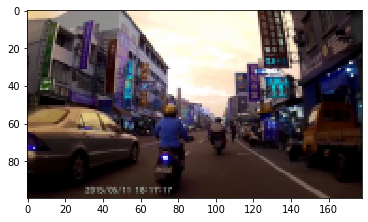

In [6]:
plt.imshow(cv2.resize(frames[0], (178, 100), interpolation = cv2.INTER_AREA))

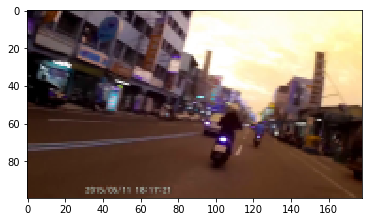

In [7]:
plt.imshow(cv2.resize(frames[99], (178, 100), interpolation = cv2.INTER_AREA))

In [8]:
l_img = frames[30]
small_to_large_image_size_ratio = 0.15
small_img = cv2.resize(l_img, 
                       (0,0), # set fx and fy, not the final size
                       fx=small_to_large_image_size_ratio, 
                       fy=small_to_large_image_size_ratio, 
                       interpolation=cv2.INTER_NEAREST)

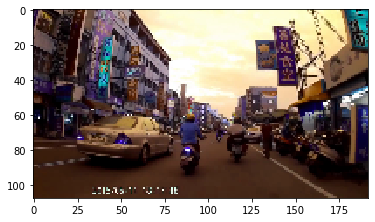

In [9]:
plt.imshow(small_img)

In [10]:
small_img.shape

(108, 192, 3)

In [11]:
small_img_yolo, boxes = detect_objects_and_return_points(small_img)

NameError: name 'Darknet' is not defined

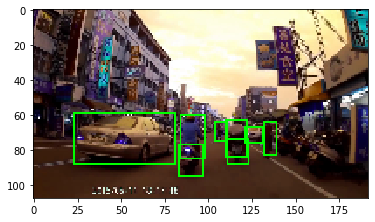

In [27]:
plt.imshow(small_img_yolo)

In [28]:
gray = cv2.cvtColor(small_img_yolo, cv2.COLOR_RGB2GRAY)

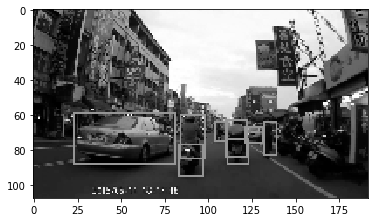

In [29]:
plt.imshow(gray, cmap='gray')

START CLASSIFICATION  
For video 36, crash occurs at frame 73  
For video 38, crash occurs at frame 79  
For video 39, crash occurs at frame 78

In [40]:
num_vids_pos = 6
num_vids_neg = 6
X_train_pos = read_images_from_multiple_videos_positive([30, 31, 32, 33, 34, 35])
X_train_neg = read_images_from_multiple_videos_negative([30, 31, 32, 33, 34, 35])
X_train = X_train_pos + X_train_neg
for i in range(len(X_train)):
    X_train[i] = cv2.resize(X_train[i], (178, 100), interpolation = cv2.INTER_AREA)
    X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)
X_train = np.reshape(X_train, ( (num_vids_pos+num_vids_neg)*100, 100, 178, 1) )

In [41]:
y_train = np.asarray( ([0]*60 + [1]*20 + [0]*20) * num_vids_pos + ([0]*100) * num_vids_neg)
y_train = np.reshape(y_train, ((num_vids_pos + num_vids_neg)*100, 1))

In [42]:
model = tf.keras.Sequential()

'''model.add(layers.ConvLSTM2D(filters=3, kernel_size=(3, 3), input_shape=(None, 108, 192), padding='same', return_sequences=True))
model.add(layers.Reshape((1, 192, 108)))
model.add(layers.ConvLSTM2D(filters=3, kernel_size=(3, 3), padding='same', return_sequences=True))
model.add(layers.BatchNormalization())
model.add(layers.Conv3D(filters=3, kernel_size=(3, 3, 3), activation='sigmoid', padding='same'))
model.add(layers.MaxPooling3D(pool_size=(2, 2, 2)))
model.add(layers.Reshape((1, 108, 192)))
model.add(tf.keras.layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))'''
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,178,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 176, 32)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 174, 64)       18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 172, 16)       9232      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 86, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 86, 16)        0         
_________________________________________________________________
flatten (Flatten)    

In [ ]:
model.fit(X_train, y_train, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


In [25]:
video = path_to_dashcam_video_dataset + 'videos/training/positive/000030.mp4'
X_test = read_images_from_video(video)
for i in range(len(X_test)):
    X_test[i] = cv2.resize(X_test[i], (178, 100), interpolation = cv2.INTER_AREA)
    X_test[i] = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)
X_test = np.reshape(X_test, (100, 100, 178, 1)) 

In [26]:
y_test = model.predict(X_test)

In [27]:
ones = []
for i in range(len(y_test)):
    if (y_test[i]) > 0.5: ones.append(i)
print(ones)

[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


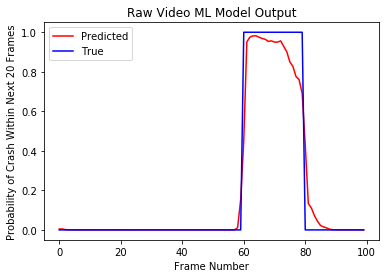

In [28]:
plt.xlabel('Frame Number')
plt.ylabel('Probability of Crash Within Next 20 Frames')
plt.title('Raw Video ML Model Output')
plt.plot(model.predict(X_test), 'r', label='Predicted')
y_true = np.zeros(100)
y_true[60:80] = 1
plt.plot(y_true, 'b', label='True')
plt.legend()
plt.show()

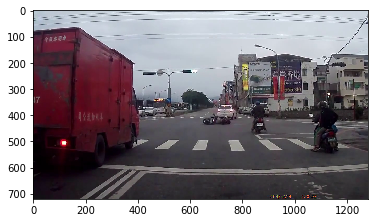

In [29]:
check_frames = read_images_from_video(video)
plt.imshow(cv2.cvtColor(check_frames[82], cv2.COLOR_BGR2RGB))

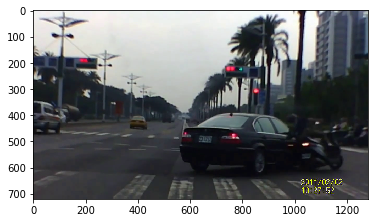

In [74]:
plt.imshow(cv2.cvtColor(check_frames[80], cv2.COLOR_BGR2RGB))

In [14]:
from tensorflow.keras.models import load_model

model.save('my_model_NAME.h5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
# identical to the previous one
#model = load_model('my_model_NAME.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
